# Get urls to txt

In [4]:
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import urllib.request
import time
from threading import Thread
import os

In [5]:
def is_valid(url):
    '''
    Check whether url is a valid url
    '''
    parsed = urlparse(url)
    return bool(parsed.scheme) and bool(parsed.netloc)

In [6]:
def get_all_images(url):
    """
    Returns all image URLs on a single `url`
    """
    soup = BeautifulSoup(urllib.request.urlopen(url), "html.parser")
    urls = []
    for img in soup.find_all("img"):
        img_url = img.attrs.get("src")
        
        if not img_url:
            # if img does not contain src attribute, just skip
            continue
        
        # make the URL absolute by joining domain with the URL that is just extracted
        img_url = urljoin(url, img_url)
        # remove URLs like '/hsts-pixel.gif?c=3.2.5'
        try:
            pos = img_url.index("?")
            img_url = img_url[:pos]
        except ValueError:
            pass
        
        # finally, if the url is valid
        if is_valid(img_url):
            urls.append(img_url)
    
    return urls

In [7]:
class GetImagesfromPages():
    def __init__(self, nThreads, npage, url_page):
        self.nThreads = nThreads
        self.npage = npage
        self.url_page = url_page

        self.result_urls = []
    
    # Func target
    def main(self, start, end):
        
        for i in range(start,end):
            try:
                self.result_urls.extend(get_all_images(self.url_page + str(i)))
            except:
                pass
        
    def __call__(self):
        
        # Create Threads
        threads = []
        
        batch = self.npage//self.nThreads
        for i in range(0, self.npage, batch):
            start = i
            end = i + batch
           
            if end >= self.npage:
                end = self.npage + 1

            threads.append(Thread(target=self.main, args = (start, end)))
        
        start = time.time()
        for i in range(self.nThreads):
            threads[i].start()
        for i in range(self.nThreads):
            threads[i].join()
        end = time.time()
        
        print(f"Time handle pages = {end - start:.2f}s", )
    
        return self.result_urls

In [8]:
animal  =  ["Monkey",  "Elephant",  "cows",  
"Cat",  "Dog",  "bear",  "fox",  "Civet", 
"Pangolins", "Rabbit", "Bats", "Whale", 
"Cock", "Owl", "flamingo", "Lizard", "Turtle", 
"Snake", "Frog", "Fish", "shrimp", "Crab", "Snail", 
"Coral", "Jellyfish", "Butterfly", "Flies", "Mosquito", 
"Ants", "Cockroaches", "Spider", "scorpion", "tiger", 
"bird",  "horse", "pig", "Alligator" ,"Alpaca" , 
"Anteater", "donkey", "Bee", "Buffalo", "Camel", 
"Caterpillar", "Cheetah", "Chicken",  "Dragonfly", 
"Duck", "panda", "Giraffe"]

plant = ["Bamboo", "Apple", "Apricot", "Banana", "Bean", 
"Wildflower", "Flower", "Mushroom", "Weed", "Fern" , "Reed", 
"Shrub", "Moss", "Grass", "Palm_tree", "Corn", "Tulip", "Rose",
"Clove", "Dogwood", "Durian", "Ferns", "Fig", "Flax", "Frangipani", 
"Lantana", "Hibiscus", "Bougainvillea", "Pea", "Orchid_Tree", "Rangoon_Creeper",
"Jack_fruit", "Cotton_plant", "Cornelian_tree", "Coffee_plant", "Coconut"
, "wheat", "watermelon", "radish", "carrot"]

furniture = ["bed", "cabinet", "chair", "chests", "clock", 
"desks", "table", "Piano", "Bookcase", "Umbrella", "Clothes", 
"cart", "sofa", "ball", "spoon", "Bowl", "fridge", "pan", "book"]

scenery = ["Cliff", "Bay", "Coast", "Mountains", "Forests", 
"Waterbodies", "Lake", "desert", "farmland", "river", "hedges", 
"plain", "sky", "cave", "cloud", "flower_garden", "glacier", 
"grassland", "horizon", "lighthouse", "plateau", "savannah", "valley", "volcano", "waterfall"]

In [9]:
urltopic = {
    "freepik": "https://www.freepik.com/search?from_query={name}&query={name}&sort=popular&type=photo&page=",
    "freeimages": "https://www.freeimages.com/search/{name}/"
}

In [10]:
n_threads = 3
n_pages = 6

for dir, names in zip(["animal", "plant", "furniture", "scenery"], [animal, plant, furniture, scenery]):

    dir_path_urls = f"{dir}/urls"
    if not os.path.exists(dir_path_urls):
        os.makedirs(dir_path_urls)

    for name in names:
        result_of_name = GetImagesfromPages(min(n_threads, n_pages//2), n_pages, 
                                            urltopic["freeimages"].format(name = name))()
        
        result_of_name = list(set(result_of_name))
        
        print(f"{dir_path_urls}/{dir}_{name}.txt have {len(result_of_name)} images \n")
        strResult = '\n'.join(result_of_name)
        with open(f"{dir_path_urls}/{dir}_{name}.txt", "w") as f:
            f.write(strResult)

Time handle pages = 1.36s
animal/urls/animal_Monkey.txt have 78 images 

Time handle pages = 1.44s
animal/urls/animal_Elephant.txt have 78 images 

Time handle pages = 10.83s
animal/urls/animal_cows.txt have 378 images 

Time handle pages = 5.13s
animal/urls/animal_Cat.txt have 78 images 

Time handle pages = 3.91s
animal/urls/animal_Dog.txt have 78 images 

Time handle pages = 7.31s
animal/urls/animal_bear.txt have 378 images 

Time handle pages = 2.77s
animal/urls/animal_fox.txt have 378 images 

Time handle pages = 4.14s
animal/urls/animal_Civet.txt have 21 images 

Time handle pages = 0.93s
animal/urls/animal_Pangolins.txt have 10 images 

Time handle pages = 2.62s
animal/urls/animal_Rabbit.txt have 78 images 

Time handle pages = 6.55s
animal/urls/animal_Bats.txt have 52 images 

Time handle pages = 3.39s
animal/urls/animal_Whale.txt have 78 images 

Time handle pages = 4.09s
animal/urls/animal_Cock.txt have 78 images 

Time handle pages = 2.05s
animal/urls/animal_Owl.txt have 78 

# Get images from txts

In [11]:
from threading import Thread
import time
import requests
import random
import os

In [12]:
class DownloadImagesFromUrls():
    def __init__(self, nThreads, urls, destinate_folder):
        self.nThreads = nThreads
        self.urls = urls
        self.n = len(urls)
        self.destinate_folder = destinate_folder
        
    # Func target
    def download_url(self, start, end):

        for i in range(start, end):
            a = random.random()
            urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")

            print('.', end=" ")         
                 
    def __call__(self):

        threads = []
        batch = self.n//self.nThreads
        for i in range(0, self.n, batch):
            start = i
            end = i + batch

            if end >= self.n:
                end = self.n + 1

            threads.append(Thread(target=self.download_url, args = (start, end)))

        start = time.time()
        for i in range(self.nThreads):
            threads[i].start()
        for i in range(self.nThreads):
            threads[i].join() 
        end = time.time()

        print(f"\nTime handle download urls = {end - start:.2f}s\n", )

In [13]:
for dir, names in zip(["animal", "plant", "furniture", "scenery"], [animal, plant, furniture, scenery]):

    dir_path_images = f"images"
    dir_path_urls = f"{dir}/urls"
    if not os.path.exists(dir_path_images):
        os.makedirs(dir_path_images)

    txts = [name for name in os.listdir(dir_path_urls) if name.endswith(".txt")]

    for txt in txts:
        folder_txt = f"{dir_path_urls}/{txt}"
        with open(folder_txt, "r") as f:
            content_txt = f.readlines()

        folder_image = f"{dir_path_images}/{txt}"
        if not os.path.exists(folder_image[:-4]):
            os.makedirs(folder_image[:-4])
        
        n_threads = 10
        DownloadImagesFromUrls(min(n_threads, len(content_txt)//2), content_txt, folder_image[:-4])()

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 4.88s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.87s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Exception in thread Thread-487:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-12-09a1da4e612d>", line 13, in download_url
    urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
  File "/usr/lib/python3.7/urllib/request.py", line 247, in urlretrieve
    with contextlib.closing(urlopen(url, data)) as fp:
  File "/usr/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/usr/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/usr/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.7/urlli

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Exception in thread Thread-486:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-12-09a1da4e612d>", line 13, in download_url
    urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
  File "/usr/lib/python3.7/urllib/request.py", line 247, in urlretrieve
    with contextlib.closing(urlopen(url, data)) as fp:
  File "/usr/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/usr/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/usr/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.7/urlli

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Exception in thread Thread-492:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-12-09a1da4e612d>", line 13, in download_url
    urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
  File "/usr/lib/python3.7/urllib/request.py", line 247, in urlretrieve
    with contextlib.closing(urlopen(url, data)) as fp:
  File "/usr/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/usr/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/usr/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.7/urlli

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 9.35s

. . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 0.62s

. . . . . . . . . . 
Time handle download urls = 0.23s



Exception in thread Thread-510:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-12-09a1da4e612d>", line 13, in download_url
    urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
IndexError: list index out of range



. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.54s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.41s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.79s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.81s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.90s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Exception in thread Thread-862:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-12-09a1da4e612d>", line 13, in download_url
    urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
IndexError: list index out of range



. . . . . . . . . . . . . . 
Time handle download urls = 0.80s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Exception in thread Thread-867:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-12-09a1da4e612d>", line 13, in download_url
    urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
  File "/usr/lib/python3.7/urllib/request.py", line 247, in urlretrieve
    with contextlib.closing(urlopen(url, data)) as fp:
  File "/usr/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/usr/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/usr/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.7/urlli

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 7.97s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.84s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.68s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls =

Exception in thread Thread-1235:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-12-09a1da4e612d>", line 13, in download_url
    urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
IndexError: list index out of range



. . . . . . . . . . . 
Time handle download urls = 1.02s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.60s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.60s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.53s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.69s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.81s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Exception in thread Thread-1409:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-12-09a1da4e612d>", line 13, in download_url
    urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
  File "/usr/lib/python3.7/urllib/request.py", line 247, in urlretrieve
    with contextlib.closing(urlopen(url, data)) as fp:
  File "/usr/lib/python3.7/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)
  File "/usr/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/usr/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.7/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.7/urll

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 8.72s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 9.73s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Exception in thread Thread-1455:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-12-09a1da4e612d>", line 13, in download_url
    urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
IndexError: list index out of range



. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 9.54s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 2.68s

. . . . 

Exception in thread Thread-1690:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-12-09a1da4e612d>", line 13, in download_url
    urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
IndexError: list index out of range



. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 1.31s

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 8.93s

. . . . . . . . . . . . . . . . . . . . . . . . 

# Preprocessing

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
def read_image_from_path(path, size):
    im = Image.open(path).resize(size)
    return np.asarray(im, dtype=np.float32)

In [ ]:
def folder_to_images(folder, size=(224, 224)):
    
    list_dir = [folder + '/' + name for name in os.listdir(folder) if name.endswith((".jpg", ".png", ".jpeg"))]
    
    i = 0
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for path in list_dir:
        try:
            images_np[i] = read_image_from_path(path, size)
            images_path.append(path)
            i += 1
            
        except Exception:
            print("error: ", path)
            os.remove(path)

    images_path = np.array(images_path)
    return images_np, images_path

# Experiment Methods

## Absolute Difference

In [ ]:
def absolute_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    abs_diff = np.sum(np.abs(X-query), axis_batch_size)
    return abs_diff

In [ ]:
def get_l1_score(root_img_path, query_path, size):
    dic_categories = ['scenery', 'funiture', 'animal', 'plant']
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    folder_paths = os.listdir(root_img_path)
    for folder in folder_paths:
        if folder.split("_")[0] in dic_categories:
            path = root_img_path + folder
            img_np, img_path = folder_to_images(path, size)
            rates = absolute_difference(query, img_np)
            ls_path_score.extend(list(zip(img_path, rates)))
    return query, ls_path_score

In [ ]:
def plot_results(query, ls_path_score):
    plt.imshow(query/255.0)
    fig = plt.figure(figsize=(15, 15))
    cols, rows = 5, 6
    for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
        img = np.random.randint(10, size=(10,10))
        fig.add_subplot(rows, cols, i)
        plt.imshow(plt.imread(path[0]))
        plt.axis('off')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/AIO_2022/File/basic_image_retrieval

/content/gdrive/MyDrive/AIO_2022/File/basic_image_retrieval


In [ ]:
root_img_path = "/content/images/"
query_path = "apple.jpg"
size = (80, 80)

In [ ]:
query, ls_path_score = get_l1_score(root_img_path, query_path, size)

error:  /content/images/plant_Cornelian_tree/0.5734030593085232.jpg
error:  /content/images/plant_Cornelian_tree/0.5243503778715558.jpg
error:  /content/images/plant_Cornelian_tree/0.7999133845649977.jpg
error:  /content/images/plant_Cornelian_tree/0.46731458744911436.jpg
error:  /content/images/plant_Cornelian_tree/0.42075145316066187.jpg
error:  /content/images/plant_Cornelian_tree/0.08661532881442724.jpg
error:  /content/images/plant_Cornelian_tree/0.5194034121768745.jpg
error:  /content/images/plant_Cornelian_tree/0.14957441635779967.jpg
error:  /content/images/plant_Fig/0.7977704116738678.jpg
error:  /content/images/plant_Fig/0.7142409360170028.jpg
error:  /content/images/plant_Fig/0.3396856372846363.jpg
error:  /content/images/plant_Fig/0.29219564899289807.jpg
error:  /content/images/plant_Fig/0.4267534820576552.jpg
error:  /content/images/plant_Fig/0.40730539770818375.jpg
error:  /content/images/plant_Fig/0.9523831236988676.jpg
error:  /content/images/plant_Fig/0.582545390359641

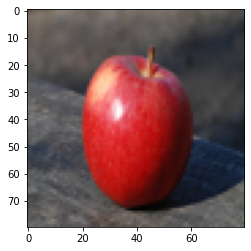

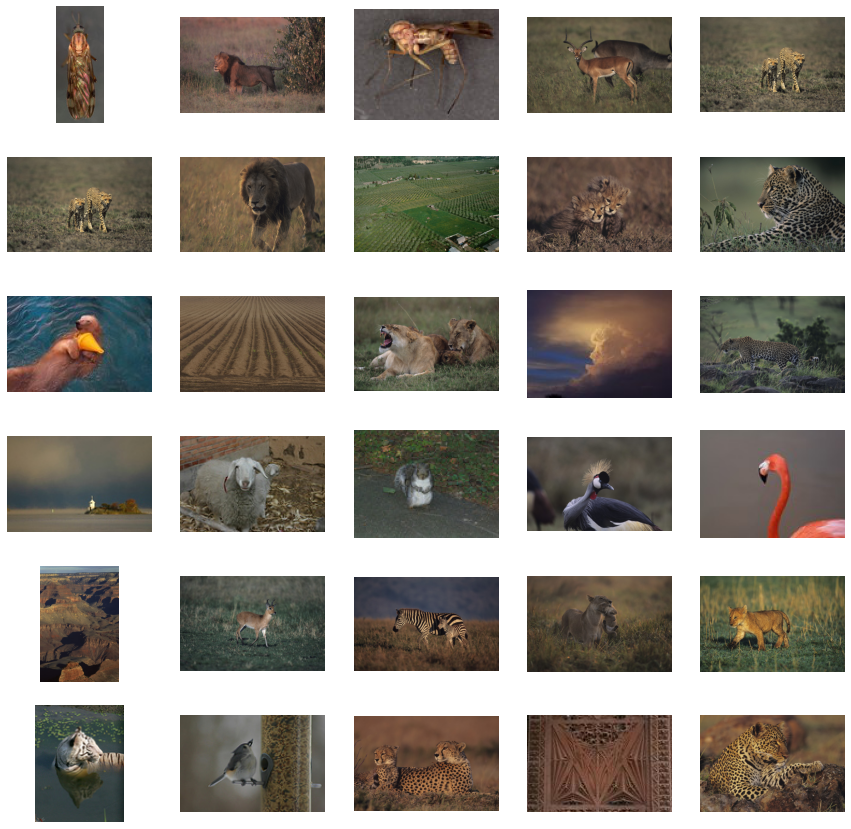

In [ ]:
plot_results(query, ls_path_score)

## Mean Square Different

In [ ]:
def mean_square_different(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    mean_square_diff = np.mean((X - query)**2, axis=axis_batch_size)
    return mean_square_diff

In [ ]:
def get_l2_score(root_img_path, query_path, size):
    dic_categories = ['scenery', 'funiture', 'animal', 'plant']
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    folder_paths = os.listdir(root_img_path)
    for folder in folder_paths:
        if folder.split("_")[0] in dic_categories:
            path = root_img_path + folder
            img_np, img_path = folder_to_images(path, size)
            rates = mean_square_different(query, img_np)
            ls_path_score.extend(list(zip(img_path, rates)))
    return query, ls_path_score

In [ ]:
root_img_path = "/content/images/"
query_path = "apple.jpg"
size = (80, 80)

In [ ]:
query, ls_path_score = get_l2_score(root_img_path, query_path, size)

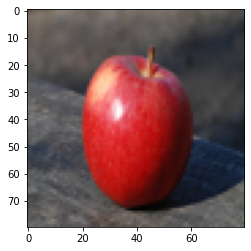

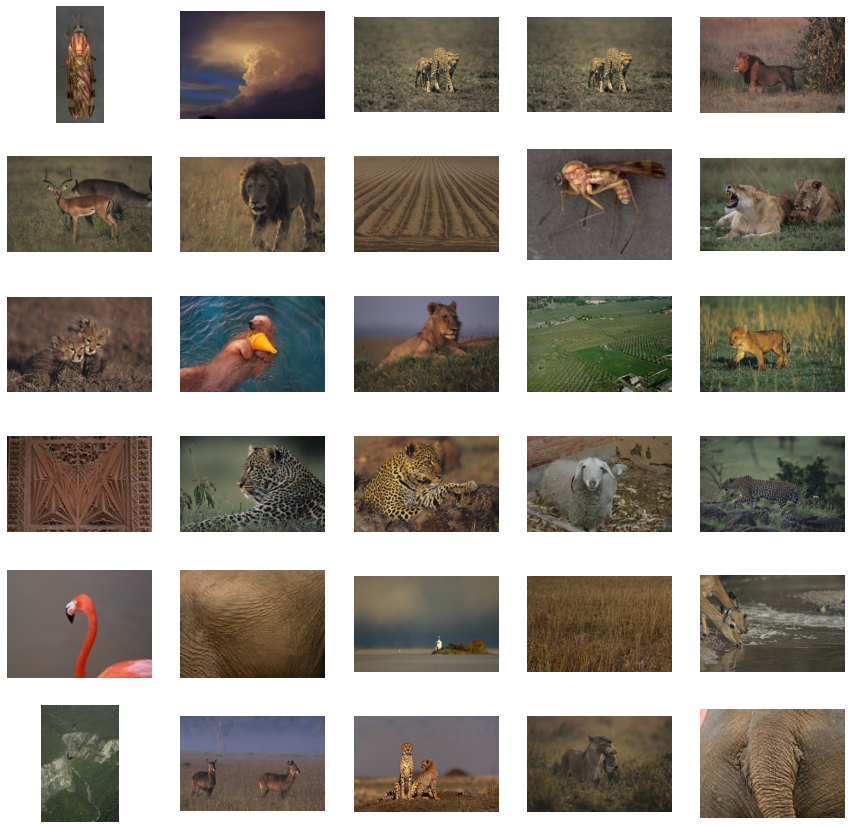

In [ ]:
plot_results(query, ls_path_score)

## Cosin Similarity

In [ ]:
def cosine_similarity(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    X_norm = np.sqrt(np.sum(X**2, axis=axis_batch_size))
    return np.sum(X * query, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [ ]:
def get_cosin_score(root_img_path, query_path, size):
    dic_categories = ['scenery', 'funiture', 'animal', 'plant']
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    folder_paths = os.listdir(root_img_path)
    for folder in folder_paths:
        if folder.split("_")[0] in dic_categories:
            path = root_img_path + folder
            img_np, img_path = folder_to_images(path, size)
            rates = cosine_similarity(query, img_np)
            ls_path_score.extend(list(zip(img_path, rates)))
    return query, ls_path_score

In [ ]:
root_img_path = "/content/images/"
query_path = "apple.jpg"
size = (80, 80)

In [ ]:
query, ls_path_score = get_cosin_score(root_img_path, query_path, size)

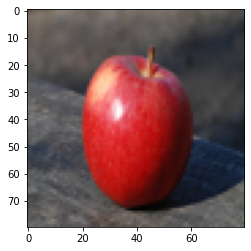

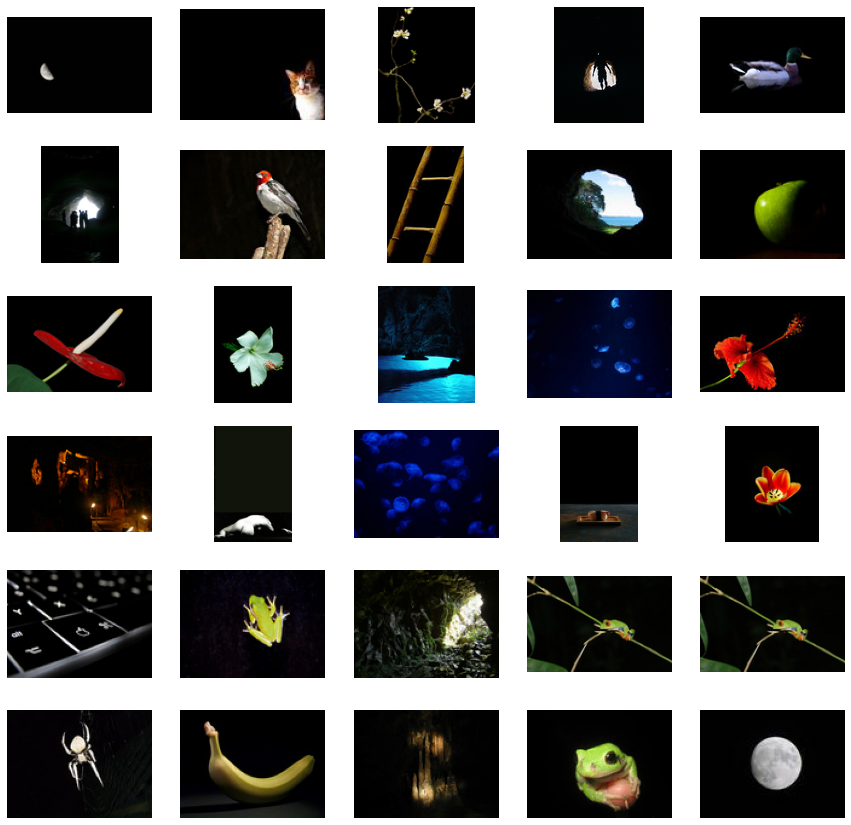

In [ ]:
plot_results(query, ls_path_score)

## Correlation Coefficient

In [ ]:
def correlation_coefficient(query, X):
    
    axis_batch_size = tuple(range(1,len(X.shape)))
    
    query_mean = query - np.mean(query)
    X_mean = X - np.mean(X, axis=axis_batch_size, keepdims=True)
    
    query_norm = np.sqrt(np.sum(query_mean**2))
    X_norm = np.sqrt(np.sum(X_mean**2, axis=axis_batch_size))
    
    return np.sum(X_mean * query_mean, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [ ]:
def get_correlation_coefficient_score(root_img_path, query_path, size):
    dic_categories = ['scenery', 'funiture', 'animal', 'plant']
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    folder_paths = os.listdir(root_img_path)
    for folder in folder_paths:
        if folder.split("_")[0] in dic_categories:
            path = root_img_path + folder
            img_np, img_path = folder_to_images(path, size)
            rates = correlation_coefficient(query, img_np)
            ls_path_score.extend(list(zip(img_path, rates)))
    return query, ls_path_score

In [ ]:
root_img_path = "/content/images/"
query_path = "apple.jpg"
size = (80, 80)

In [ ]:
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)

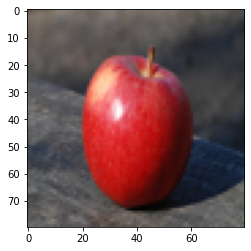

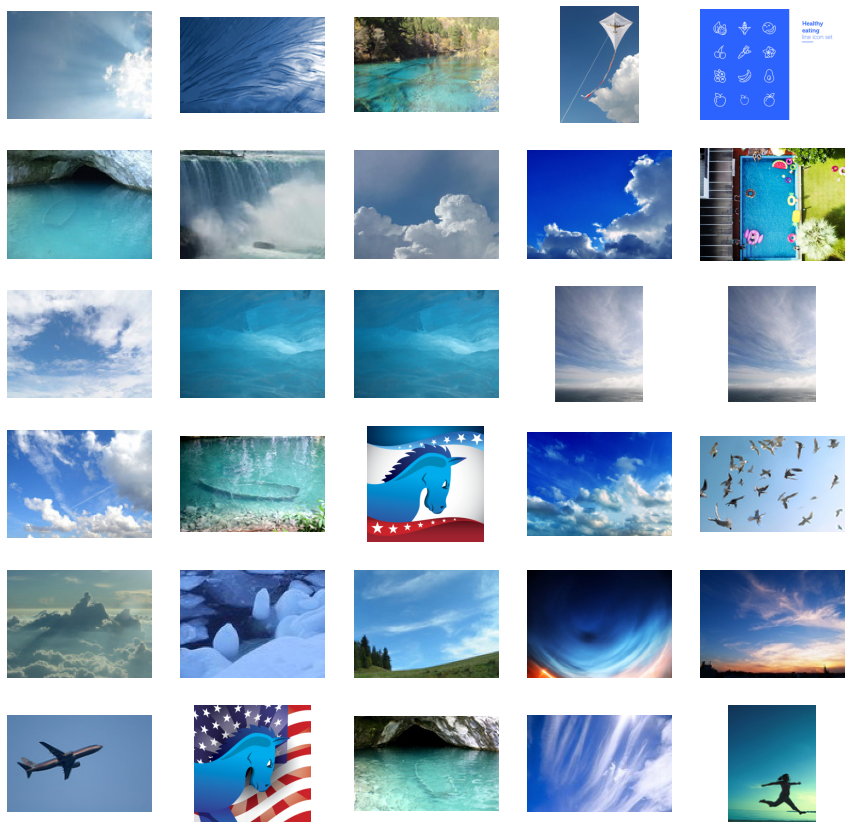

In [ ]:
plot_results(query, ls_path_score)